# 自我練習：資料集House Prices - Advanced Regression Techniques
來源：https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

**使用House Prices - Advanced Regression Techniques資料集建立DNN模型，以此預測房屋售價(SalePrice)**

**欄位介紹：**
1. 	SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
2. 	MSSubClass: The building class
3. 	MSZoning: The general zoning classification
4.	LotFrontage: Linear feet of street connected to property
5.	LotArea: Lot size in square feet
6.	Street: Type of road access
7.	Alley: Type of alley access
8.	LotShape: General shape of property
9.	LandContour: Flatness of the property
10.	Utilities: Type of utilities available
11.	LotConfig: Lot configuration
12.	LandSlope: Slope of property
13.	Neighborhood: Physical locations within Ames city limits
14.	Condition1: Proximity to main road or railroad
15.	Condition2: Proximity to main road or railroad (if a second is present)
16.	BldgType: Type of dwelling
17.	HouseStyle: Style of dwelling
18.	OverallQual: Overall material and finish quality
19.	OverallCond: Overall condition rating
20.	YearBuilt: Original construction date
21.	YearRemodAdd: Remodel date
22.	RoofStyle: Type of roof
23.	RoofMatl: Roof material
24.	Exterior1st: Exterior covering on house
25.	Exterior2nd: Exterior covering on house (if more than one material)
26.	MasVnrType: Masonry veneer type
27.	MasVnrArea: Masonry veneer area in square feet
28.	ExterQual: Exterior material quality
29.	ExterCond: Present condition of the material on the exterior
30.	Foundation: Type of foundation
31.	BsmtQual: Height of the basement
32.	BsmtCond: General condition of the basement
33.	BsmtExposure: Walkout or garden level basement walls
34.	BsmtFinType1: Quality of basement finished area
35.	BsmtFinSF1: Type 1 finished square feet
36.	BsmtFinType2: Quality of second finished area (if present)
37.	BsmtFinSF2: Type 2 finished square feet
38.	BsmtUnfSF: Unfinished square feet of basement area
39.	TotalBsmtSF: Total square feet of basement area
40.	Heating: Type of heating
41.	HeatingQC: Heating quality and condition
42.	CentralAir: Central air conditioning
43.	Electrical: Electrical system
44.	1stFlrSF: First Floor square feet
45.	2ndFlrSF: Second floor square feet
46.	LowQualFinSF: Low quality finished square feet (all floors)
47.	GrLivArea: Above grade (ground) living area square feet
48.	BsmtFullBath: Basement full bathrooms
49.	BsmtHalfBath: Basement half bathrooms
50.	FullBath: Full bathrooms above grade
51.	HalfBath: Half baths above grade
52.	Bedroom: Number of bedrooms above basement level
53.	Kitchen: Number of kitchens
54.	KitchenQual: Kitchen quality
55.	TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
56.	Functional: Home functionality rating
57.	Fireplaces: Number of fireplaces
58.	FireplaceQu: Fireplace quality
59.	GarageType: Garage location
60.	GarageYrBlt: Year garage was built
61.	GarageFinish: Interior finish of the garage
62.	GarageCars: Size of garage in car capacity
63.	GarageArea: Size of garage in square feet
64.	GarageQual: Garage quality
65.	GarageCond: Garage condition
66.	PavedDrive: Paved driveway
67.	WoodDeckSF: Wood deck area in square feet
68.	OpenPorchSF: Open porch area in square feet
69.	EnclosedPorch: Enclosed porch area in square feet
70.	3SsnPorch: Three season porch area in square feet
71.	ScreenPorch: Screen porch area in square feet
72.	PoolArea: Pool area in square feet
73.	PoolQC: Pool quality
74.	Fence: Fence quality
75.	MiscFeature: Miscellaneous feature not covered in other categories
76.	MiscVal: `$`Value of miscellaneous feature
77.	MoSold: Month Sold
78.	YrSold: Year Sold
79.	SaleType: Type of sale
80.	SaleCondition: Condition of sale

In [1]:
import pandas as pd
train_data = pd.read_csv("data/house-prices-advanced-regression-techniques/train.csv")
test_data = pd.read_csv("data/house-prices-advanced-regression-techniques/test.csv")

# 印出資料筆數和欄位數
print(train_data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


## 探索式資料分析 EDA

### 資料集摘要

In [2]:
# 資料集摘要
print(train_data.info())

# 找出哪些欄位有空值
# .any() 判斷Series裡的元素是否全部為Flase。若有任何一個True，則回傳True
na_list=[]
na_list=[col for col in train_data.columns if train_data[col].isna().any()]
print("\n找出哪些欄位有空值：")
print(na_list)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

可以發現LotFrontage、Alley、MasVnrType、MasVnrArea、BsmtQual、BsmtCond、BsmtExposure、BsmtFinType1、BsmtFinType2、Electrical、FireplaceQu、GarageType、GarageYrBlt、GarageFinish、GarageQual、GarageCond、PoolQC、Fence、MiscFeature 有空值(缺失值)

In [3]:
# 欄位「Id」是資料的編號，故去除掉
train_data = train_data.drop(columns=['Id'])

train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


### 查看缺失值的數量

In [4]:
# 查看缺失值的數量
# 各欄位缺失值的數量
total = train_data.isna().sum().sort_values(ascending=False)

# 各欄位缺失值的數量 / 總資料筆數
percent = (train_data.isna().sum()/train_data.isna().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


可以發現 PoolQC、MiscFeature、MiscFeature、Alley、Fence、FireplaceQu、LotFrontage 缺失值的佔比較高，故會先移除這些欄位，以免後續的分析受到影響

In [5]:
train_data=train_data.drop(columns=['PoolQC','MiscFeature','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'])

### 處理缺失值

#### 先辨識哪些欄位分別是 numeric 和 category 

In [6]:
# 如果是"numeric"的欄位，資料型態 "不會是" 「object」
# 如果是"category"的欄位，資料型態 "會是" 「object」
numeric_col = [f for f in train_data.columns if train_data.dtypes[f] != 'object']
category_col = [f for f in train_data.columns if train_data.dtypes[f] == 'object']

print("數字的欄位：\n{}".format(train_data[numeric_col].dtypes))
print("======================")
print("類別(非數字)的欄位：\n{}".format(train_data[category_col].dtypes))

數字的欄位：
MSSubClass         int64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object
類別(非數字)的欄位：
MSZoning         object
Street           object
LotShape         ob

在 numeric_col 裡其中 MSSubClass, OverallQual, OverallCond, MoSold, YrSold 這些欄位根據 data_description.txt 描述得知這些雖然是數字，但其實應該要算 category

In [7]:
# MSSubClass、OverallQual、OverallCond、MoSold、YrSold 去除
numeric_col = [i for i in numeric_col if i not in ["MSSubClass","OverallQual","OverallCond","MoSold","YrSold"]]

# 加在 category_col
category_col.extend(["MSSubClass","OverallQual","OverallCond","MoSold","YrSold"])

#### 填補缺失值

In [8]:
# numeric欄位就填補上'0'
train_data[numeric_col]=train_data[numeric_col].fillna(0)

# category欄位：把 na 改成"na"類
train_data[category_col]=train_data[category_col].astype('str')
train_data[category_col]=train_data[category_col].fillna("nan")

#### 填補完後再次查看有無缺失值

In [9]:
# 查看缺失值的數量
# 各欄位缺失值的數量
total = train_data.isna().sum().sort_values(ascending=False)

# 各欄位缺失值的數量 / 總資料筆數
percent = (train_data.isna().sum()/train_data.isna().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
MSSubClass,0,0.0
GarageYrBlt,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0
BedroomAbvGr,0,0.0
HalfBath,0,0.0
FullBath,0,0.0


In [10]:
# 查看每一欄的不同值的數量
print("\n*Numeric-{}".format(len(numeric_col)))
for i,item in zip(train_data[numeric_col].nunique().index,train_data[numeric_col].nunique()):
    print(i,"：",item)
    
print("\n*Category-{}".format(len(category_col)))
for i,item in zip(train_data[category_col].nunique().index,train_data[category_col].nunique()):
    print(i,"：",item)


*Numeric-31
LotArea ： 1073
YearBuilt ： 112
YearRemodAdd ： 61
MasVnrArea ： 327
BsmtFinSF1 ： 637
BsmtFinSF2 ： 144
BsmtUnfSF ： 780
TotalBsmtSF ： 721
1stFlrSF ： 753
2ndFlrSF ： 417
LowQualFinSF ： 24
GrLivArea ： 861
BsmtFullBath ： 4
BsmtHalfBath ： 3
FullBath ： 4
HalfBath ： 3
BedroomAbvGr ： 8
KitchenAbvGr ： 4
TotRmsAbvGrd ： 12
Fireplaces ： 4
GarageYrBlt ： 98
GarageCars ： 5
GarageArea ： 441
WoodDeckSF ： 274
OpenPorchSF ： 202
EnclosedPorch ： 120
3SsnPorch ： 20
ScreenPorch ： 76
PoolArea ： 8
MiscVal ： 21
SalePrice ： 663

*Category-43
MSZoning ： 5
Street ： 2
LotShape ： 4
LandContour ： 4
Utilities ： 2
LotConfig ： 5
LandSlope ： 3
Neighborhood ： 25
Condition1 ： 9
Condition2 ： 8
BldgType ： 5
HouseStyle ： 8
RoofStyle ： 6
RoofMatl ： 8
Exterior1st ： 15
Exterior2nd ： 16
MasVnrType ： 5
ExterQual ： 4
ExterCond ： 5
Foundation ： 6
BsmtQual ： 5
BsmtCond ： 5
BsmtExposure ： 5
BsmtFinType1 ： 7
BsmtFinType2 ： 7
Heating ： 6
HeatingQC ： 5
CentralAir ： 2
Electrical ： 6
KitchenQual ： 4
Functional ： 7
GarageType ： 7
G

### 查看這些 Numeric 的分布情況

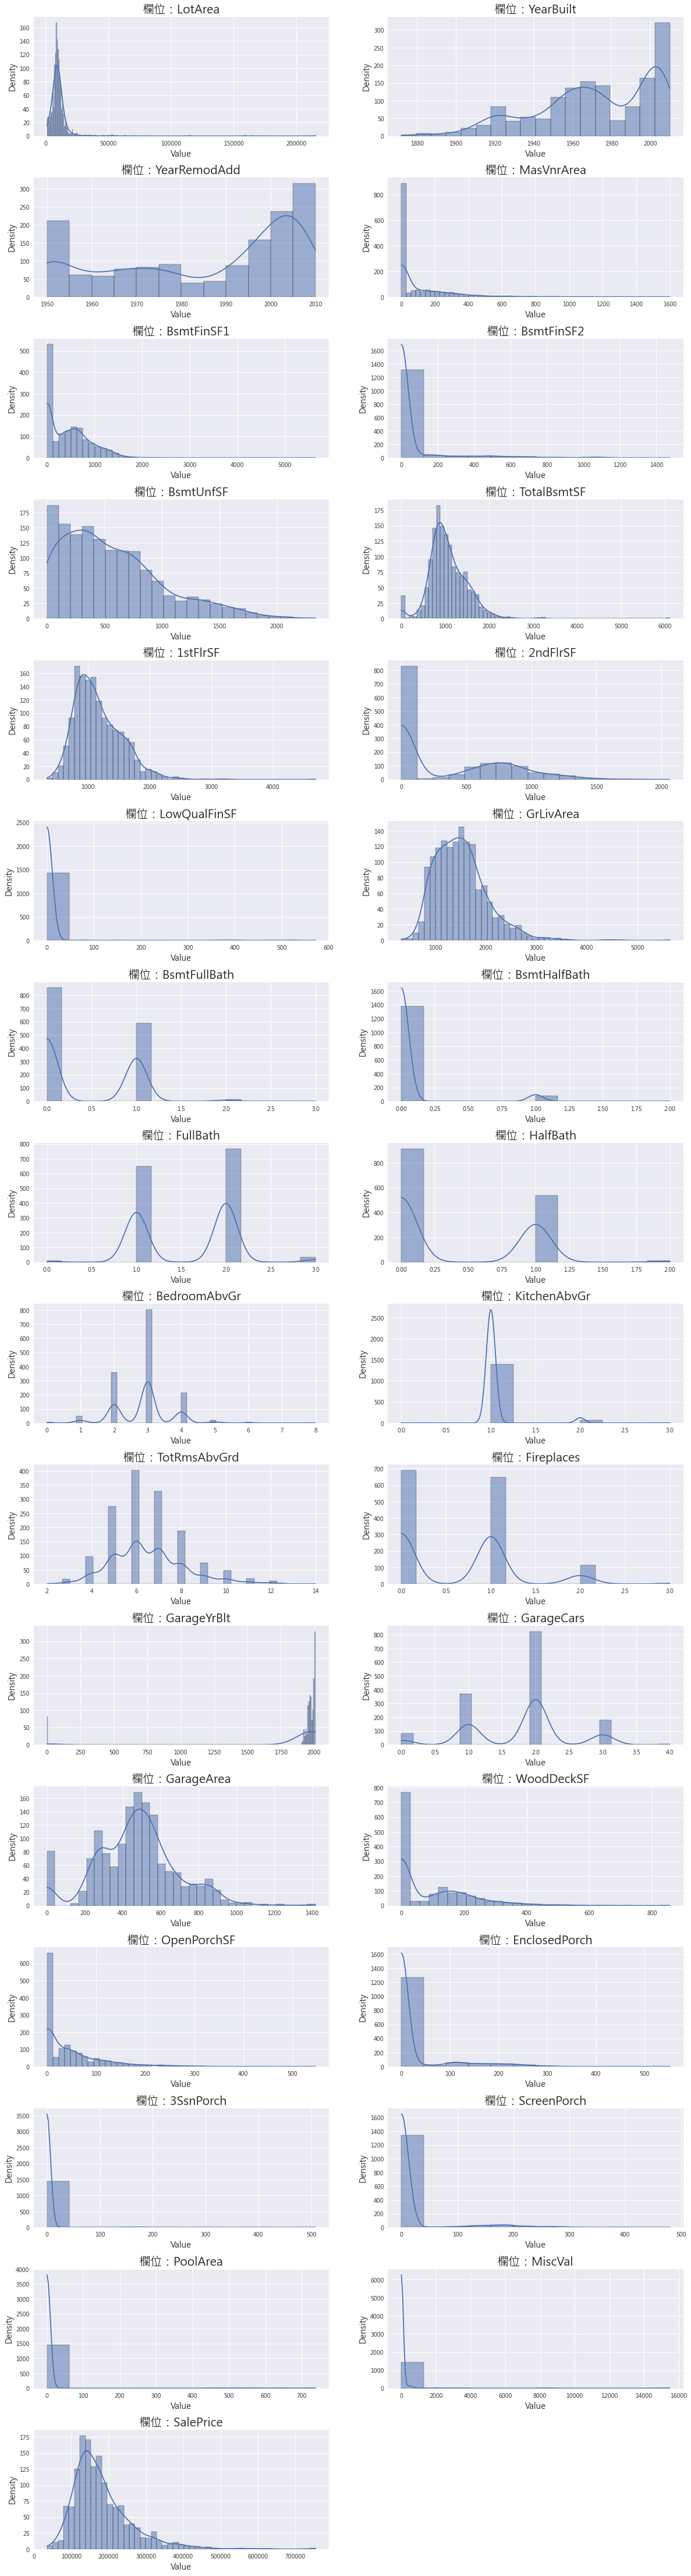

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('seaborn')
# 設定中文字形
plt.rcParams["font.sans-serif"] = ["Microsoft JhengHei"]
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
fig, axes = plt.subplots(round(len(numeric_col)/2), 2, figsize=(20,80))
axes = axes.flatten()
for i in range(0,len(numeric_col)):
    #plt.subplot(5,2,i+1)
    col_name=numeric_col[i]
    sns.histplot(train_data[col_name],kde=True,bins='auto',ax = axes[i])
    #sns.kdeplot(data.loc[data["Potability"]==1,data.columns[i]], color="#F0B27A", fill=True, label="Potable", ax = axes[i])
   
    axes[i].set_title("欄位："+col_name,fontsize=20)
    axes[i].set_xlabel("Value",fontsize=14)
    axes[i].set_ylabel("Density",fontsize=14)
    

if (len(numeric_col))%2 !=0:
    fig.delaxes(axes[len(numeric_col)])
    
plt.subplots_adjust(wspace=0.2, hspace=0.35)
plt.show()

**以boxplot(合鬚圖)查看**

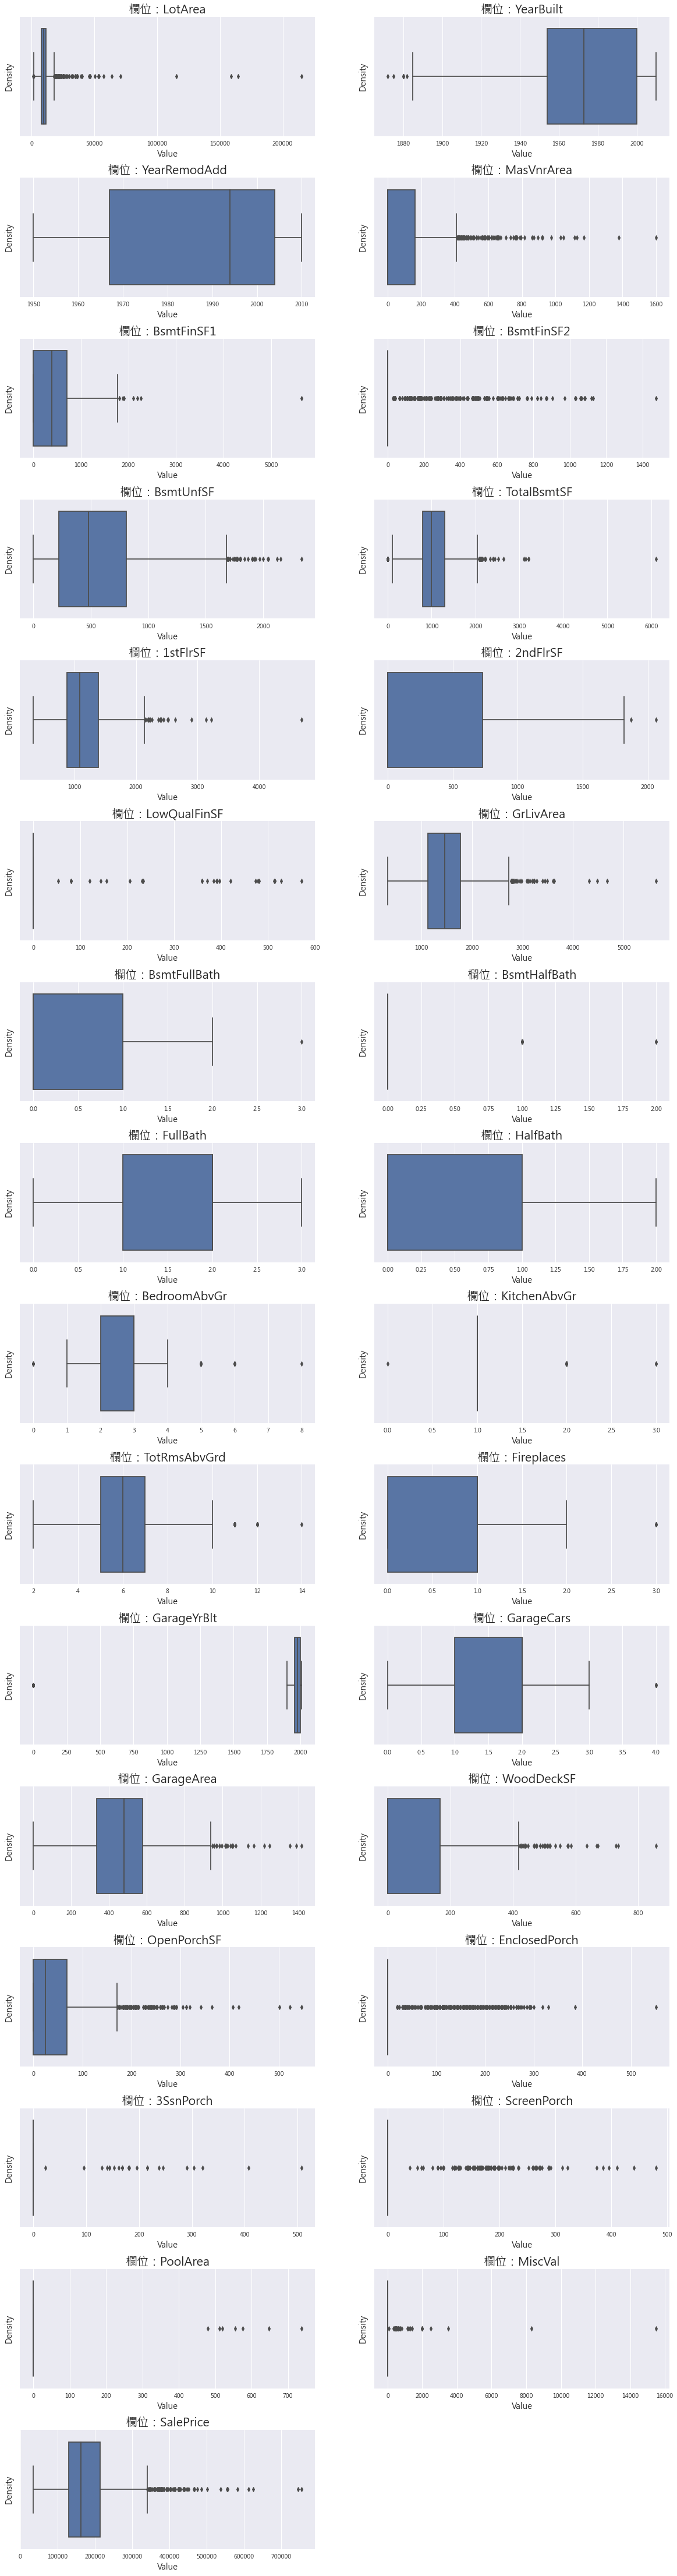

In [12]:
plt.style.use('seaborn')
# 設定中文字形
plt.rcParams["font.sans-serif"] = ["Microsoft JhengHei"]
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
fig, axes = plt.subplots(round(len(numeric_col)/2), 2, figsize=(20,80))
axes = axes.flatten()
for i in range(0,len(numeric_col)):
    
    col_name=numeric_col[i]
    sns.boxplot(x=train_data[col_name],ax = axes[i])

    axes[i].set_title("欄位："+col_name,fontsize=20)
    axes[i].set_xlabel("Value",fontsize=14)
    axes[i].set_ylabel("Density",fontsize=14)
    

if (len(numeric_col))%2 !=0:
    fig.delaxes(axes[len(numeric_col)])
    
plt.subplots_adjust(wspace=0.2, hspace=0.35)
plt.show()

### 查看這些 category 的計量情況

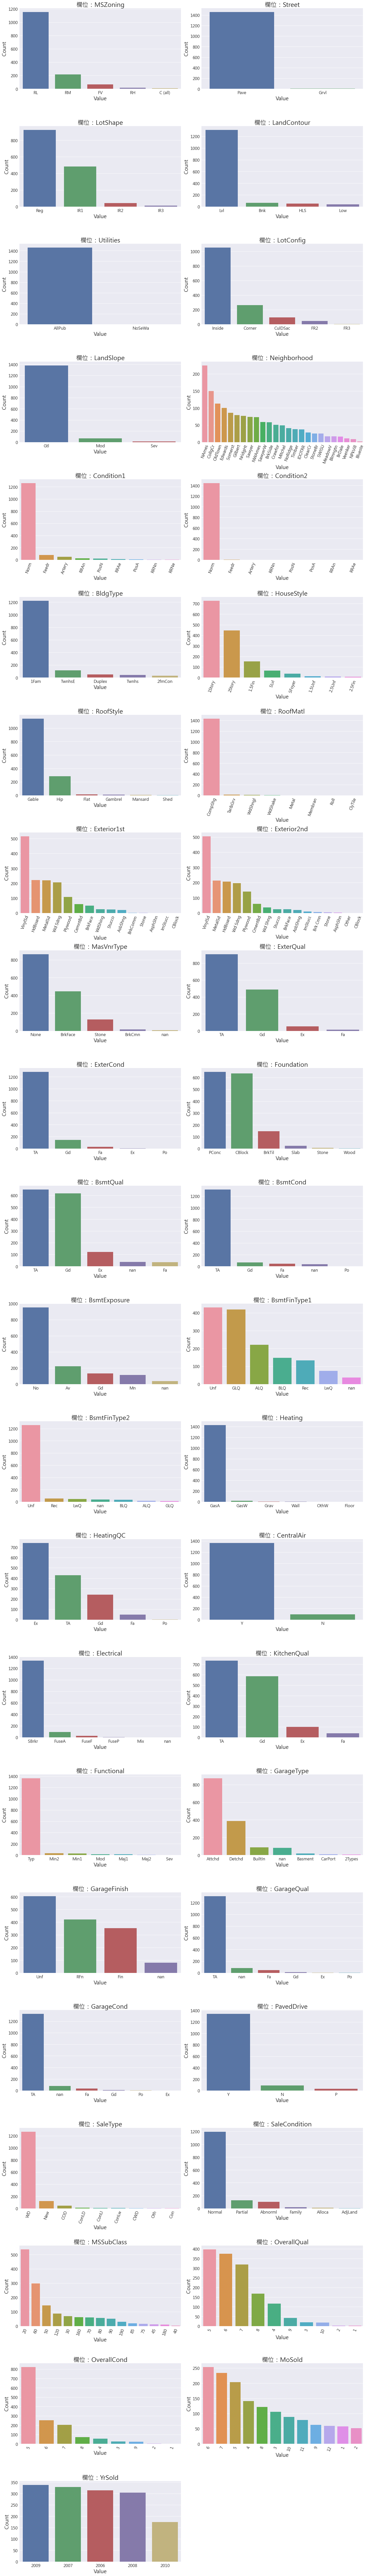

In [13]:
%matplotlib inline

fig, axes = plt.subplots(round(len(category_col)/2), 2, figsize=(20,140))
axes = axes.flatten()
for i in range(0,len(category_col)):
    #plt.subplot(5,2,i+1)
    col_name = category_col[i]
    barplot_data = train_data[col_name].value_counts()
    sns.barplot(x=barplot_data.index,y=barplot_data,ax = axes[i])
    
    axes[i].set_title("欄位："+col_name,fontsize=24)
    axes[i].set_xlabel("Value",fontsize=20)
    axes[i].set_ylabel("Count",fontsize=20)
    if (len(barplot_data)>=8):
        axes[i].set_xticklabels(barplot_data.index,rotation=70,fontsize=16)
    else:
        axes[i].set_xticklabels(barplot_data.index,fontsize=16)
       
    axes[i].yaxis.set_tick_params(labelsize=16)
    

if (len(category_col))%2 !=0:
    fig.delaxes(axes[len(category_col)])
    
#plt.subplots_adjust(wspace=0.2, hspace=0.5)
fig.tight_layout()
plt.show()

### 觀察資料變數(numeric)的相關性

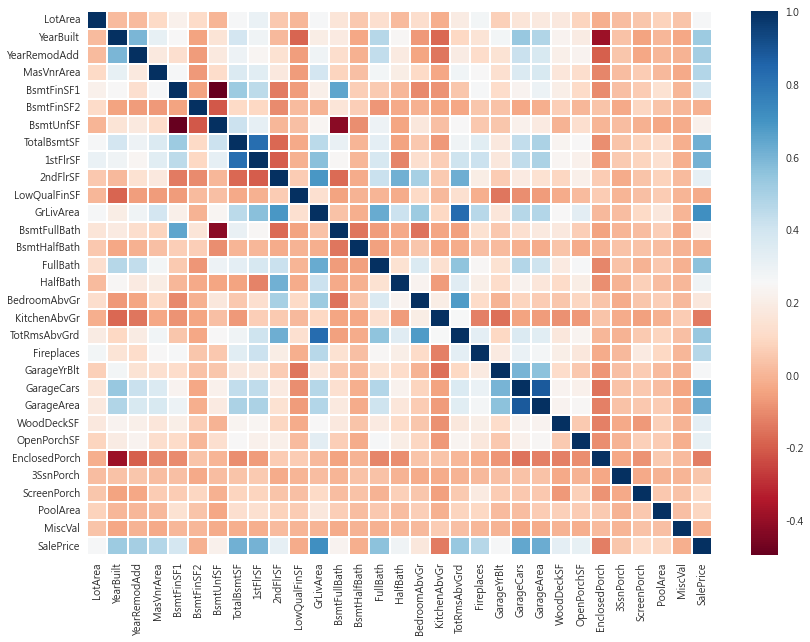

In [14]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(14,10))

corr_data = train_data[numeric_col].corr()
sns.heatmap(corr_data,cmap='RdBu', linewidths = 0.05,ax = ax)
plt.show()

## 建立DNN模型

### 將 category 型的資料轉換成數值

**等比(有序)關係的欄位**

LotShape, LandSlope, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, Functional, FireplaceQu, GarageQual, GarageCond, PavedDrive, PoolQC, Fence

剩下都是等價(無序)關係的欄位

In [15]:
# 由於這些「無序」變數的類別項目較多，若採用 One-hot encoding 會產生太多的特徵
# 因此採用 Target / Mean Encoding 型式
# 首先將這些

noseq_category_col= [i for i in category_col if i not in ['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence']]
columns_transfered = {}

for c in noseq_category_col:
    data_temp = pd.DataFrame({c:train_data[c],'target':train_data['SalePrice']})
    target_mean = data_temp.groupby(c)['target'].mean().to_dict()
    
    # 儲存轉換的規則
    columns_transfered.update({c:target_mean})
    
    # 取代原有資料
    train_data[c] = train_data[c].map(target_mean)
    

In [16]:
# 轉換的規則
columns_transfered

{'MSZoning': {'C (all)': 74528.0,
  'FV': 214014.06153846154,
  'RH': 131558.375,
  'RL': 191004.99478714162,
  'RM': 126316.83027522935},
 'Street': {'Grvl': 130190.5, 'Pave': 181130.53851444292},
 'LandContour': {'Bnk': 143104.07936507938,
  'HLS': 231533.94,
  'Low': 203661.11111111112,
  'Lvl': 180183.74675819985},
 'Utilities': {'AllPub': 180950.95681973954, 'NoSeWa': 137500.0},
 'LotConfig': {'Corner': 181623.4258555133,
  'CulDSac': 223854.6170212766,
  'FR2': 177934.5744680851,
  'FR3': 208475.0,
  'Inside': 176938.0475285171},
 'Neighborhood': {'Blmngtn': 194870.88235294117,
  'Blueste': 137500.0,
  'BrDale': 104493.75,
  'BrkSide': 124834.05172413793,
  'ClearCr': 212565.42857142858,
  'CollgCr': 197965.77333333335,
  'Crawfor': 210624.72549019608,
  'Edwards': 128219.7,
  'Gilbert': 192854.50632911394,
  'IDOTRR': 100123.78378378379,
  'MeadowV': 98576.4705882353,
  'Mitchel': 156270.1224489796,
  'NAmes': 145847.08,
  'NPkVill': 142694.44444444444,
  'NWAmes': 189050.068493

In [17]:
print(train_data[['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive']].head())

  LotShape LandSlope ExterQual ExterCond BsmtQual BsmtCond BsmtExposure  \
0      Reg       Gtl        Gd        TA       Gd       TA           No   
1      Reg       Gtl        TA        TA       Gd       TA           Gd   
2      IR1       Gtl        Gd        TA       Gd       TA           Mn   
3      IR1       Gtl        TA        TA       TA       Gd           No   
4      IR1       Gtl        Gd        TA       Gd       TA           Av   

  BsmtFinType1 BsmtFinType2 HeatingQC KitchenQual Functional GarageQual  \
0          GLQ          Unf        Ex          Gd        Typ         TA   
1          ALQ          Unf        Ex          TA        Typ         TA   
2          GLQ          Unf        Ex          Gd        Typ         TA   
3          ALQ          Unf        Gd          Gd        Typ         TA   
4          GLQ          Unf        Ex          Gd        Typ         TA   

  GarageCond PavedDrive  
0         TA          Y  
1         TA          Y  
2         TA        

#### 建立等比(有序)關係的欄位的規則

In [18]:
a={'LotShape':{'Reg':4,'IR1':3,'IR2':2,'IR3':1,'NA':0,'nan':0},
'LandSlope':{'Gtl':3,'Mod':2,'Sev':1,'NA':0,'nan':0},
'ExterQual':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'nan':0}, 
'ExterCond':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'nan':0}, 
'BsmtQual':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'nan':0}, 
'BsmtCond':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'nan':0},
'BsmtExposure':{'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0,'nan':0}, 
'BsmtFinType1':{'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0,'nan':0}, 
'BsmtFinType2':{'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0,'nan':0}, 
'HeatingQC':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'nan':0}, 
'KitchenQual':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'nan':0},
'Functional':{'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1,'NA':0,'nan':0}, 
'GarageQual':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'nan':0}, 
'GarageCond':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'nan':0}, 
'PavedDrive':{'Y':3,'P':2,'N':1,'NA':0,'nan':0}}

columns_transfered.update(a)

In [19]:
for i in a.keys():
    train_data[i]=train_data[i].map(columns_transfered[i]) 

In [20]:
train_data[columns_transfered.keys()].head()

,MSZoning,Street,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,GarageQual,GarageCond,PavedDrive
0,191004.994787,181130.538514,180183.746758,180950.95682,176938.047529,197965.773333,184495.492063,181169.405536,185763.807377,210051.764045,...,3,1,6,1,5,4,8,3,3,3
1,191004.994787,181130.538514,180183.746758,180950.95682,177934.574468,238772.727273,142475.481481,181169.405536,185763.807377,175985.477961,...,3,4,5,1,5,3,8,3,3,3
2,191004.994787,181130.538514,180183.746758,180950.95682,176938.047529,197965.773333,184495.492063,181169.405536,185763.807377,210051.764045,...,3,2,6,1,5,4,8,3,3,3
3,191004.994787,181130.538514,180183.746758,180950.95682,181623.425856,210624.725490,184495.492063,181169.405536,185763.807377,210051.764045,...,4,1,5,1,4,4,8,3,3,3
4,191004.994787,181130.538514,180183.746758,180950.95682,177934.574468,335295.317073,184495.492063,181169.405536,185763.807377,210051.764045,...,3,3,6,1,5,4,8,3,3,3


## 建立DNN模型以預測SalePrice

In [21]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
import numpy as np

X = train_data.drop(columns='SalePrice')
y = train_data['SalePrice']

# 將y進行對數轉換(以e為底)，為方便模型訓練
#y = np.log(y)

seed = 7
np.random.seed(seed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [22]:
print("X_train.shape",X_train.shape)
print(y.head())
print(train_data['SalePrice'])

X_train.shape (1022, 73)
0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64
0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [23]:
model = Sequential()
#輸入層
model.add(Dense(200,input_dim=X_train.shape[1], activation="relu"))
#隱藏層
model.add(Dense(200, activation="relu"))
model.add(Dense(200, activation="relu"))
model.add(Dense(200, activation="relu"))
model.add(Dense(200, activation="relu"))
model.add(Dense(200, activation="relu"))
model.add(Dense(200, activation="relu"))

# 輸出層
model.add(Dense(1))

In [24]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               14800     
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_4 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_5 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_6 (Dense)              (None, 200)               4

In [25]:
# 編譯模型
model.compile(loss="mae", optimizer="adam")

# 由於'SalePrice'值大於1，採用 MAE 計算 Loss 較為合適
history = model.fit(X_train, y_train, validation_split=0.3,
                   epochs=100, batch_size=16, verbose=2)

Train on 715 samples, validate on 307 samples
Epoch 1/100
715/715 - 1s - loss: 46963.0415 - val_loss: 27176.1644
Epoch 2/100
715/715 - 0s - loss: 31082.0278 - val_loss: 25111.7206
Epoch 3/100
715/715 - 0s - loss: 26895.3325 - val_loss: 26911.9354
Epoch 4/100
715/715 - 0s - loss: 35514.4129 - val_loss: 28640.0686
Epoch 5/100
715/715 - 0s - loss: 27235.3276 - val_loss: 26524.1621
Epoch 6/100
715/715 - 0s - loss: 29364.9531 - val_loss: 26685.8031
Epoch 7/100
715/715 - 0s - loss: 28060.2720 - val_loss: 38148.0393
Epoch 8/100
715/715 - 0s - loss: 27590.7078 - val_loss: 28025.4135
Epoch 9/100
715/715 - 0s - loss: 26518.6809 - val_loss: 27604.8824
Epoch 10/100
715/715 - 0s - loss: 26880.9798 - val_loss: 23808.2798
Epoch 11/100
715/715 - 0s - loss: 25641.3868 - val_loss: 23475.8942
Epoch 12/100
715/715 - 0s - loss: 26525.6488 - val_loss: 30724.7886
Epoch 13/100
715/715 - 0s - loss: 28677.3982 - val_loss: 27568.7755
Epoch 14/100
715/715 - 0s - loss: 25464.6968 - val_loss: 38069.6725
Epoch 15/10

In [26]:
loss = model.evaluate(X_train, y_train)

# 訓練資料集 MAE loss
print("訓練資料集MAE loss：{}".format(loss))

loss= model.evaluate(X_test, y_test)
# 測試資料集 MAE loss
print("測試資料集MAE loss：{}".format(loss))

1022/1022 [==============================] - 0s 39us/sample - loss: 20269.5603
訓練資料集MAE loss：20269.560336656068
438/438 [==============================] - 0s 48us/sample - loss: 24543.1604
測試資料集MAE loss：24543.160379209476


### 使用 r2_score 評估模型優良
r2_score越接近1，代表模型判斷能力越好

一般大於 0.5 就被認為是具有判斷能力的模型

In [27]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)

r2_score_value = r2_score(y_test,y_pred)
print(r2_score_value)

0.8121776761185071


#### 觀察一下MAE值

In [28]:
# 定義計算 MAE 的方法
def MAE(test, preds):
    test = np.array(test)
    preds = np.array(preds)
    return np.sum(np.abs(test-preds)) / len(test)

In [29]:
MAE(y_test,y_pred)

35684524.04669663

**MAE值有些大**

### 訓練和驗證損失的比較圖

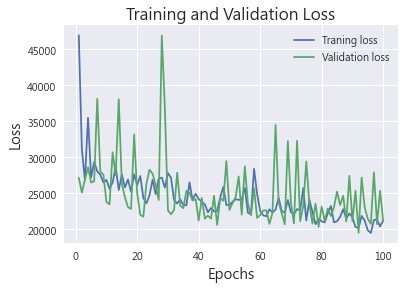

In [30]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# 設定中文字形
plt.rcParams["font.sans-serif"] = ["Microsoft JhengHei"]
plt.rcParams['axes.unicode_minus'] = False

# 訓練損失
train_loss = history.history["loss"]

# 多少個 epochs 就有多少個loss
epochs = range(1,len(train_loss)+1)

# 驗證損失
val_loss = history.history["val_loss"]

%matplotlib inline
plt.figure()
sns.lineplot(x=epochs, y=train_loss, label="Traning loss")
sns.lineplot(x=epochs, y=val_loss, label="Validation loss")
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Loss", fontsize=14)

plt.title("Training and Validation Loss", fontsize=16)
plt.legend()
plt.show()

**Loss 值雖然上下浮動，但整體趨勢是下降的**

### 利用散佈圖確認模型

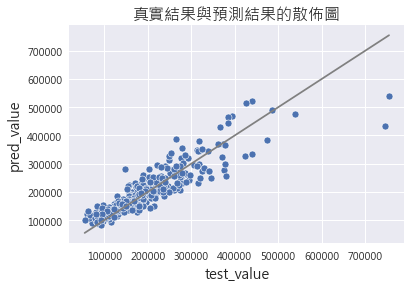

In [31]:
%matplotlib inline
plt.figure()
y_range = np.array([y_test.min(),y_test.max()])
y_pred=np.reshape(y_pred, y_pred.shape[0])
scatter_data = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
sns.scatterplot(data=scatter_data,x='y_test', y='y_pred')
sns.lineplot(x=y_range, y=y_range,color='grey')

plt.xlabel("test_value", fontsize=14)
plt.ylabel("pred_value", fontsize=14)

plt.title("真實結果與預測結果的散佈圖", fontsize=16)

plt.show()

## 儲存模型與轉換規則

#### 儲存模型的用的資料欄位與資料的轉換規則

In [32]:
# 儲存模型的用的資料欄位與資料的轉換規則
import json
columns_info={'ML_columns':list(X.columns),'predict_columns':'SalePrice','columns_transfered_rule':columns_transfered}

with open("columns_info.json", "w") as columns_info_file:
    json.dump(columns_info, columns_info_file)

#### 儲存模型

In [33]:
# 儲存模型
model.save('House_SalePrice.h5')